#### Домашнее задание 2
## Named Entety Recognition and Event Extraction from Literary Fiction

deadline: 14 ноября 2021, 23:59

В этом домашнем задании вы будете работать с корпусом LitBank. Корпус собран из популярных художественных произведений на английском языке и содержит разметку по именованным сущностям и событиям. Объем корпуса таков: 100 текстов по примерно 2000 слов каждый. 

Корпус описан в статьях:
* David Bamman, Sejal Popat, Sheng Shen, An Annotated Dataset of Literary Entities http://people.ischool.berkeley.edu/~dbamman/pubs/pdf/naacl2019_literary_entities.pdf
* Matthew Sims, Jong Ho Park, David Bamman, Literary Event Detection,  http://people.ischool.berkeley.edu/~dbamman/pubs/pdf/acl2019_literary_events.pdf

Корпус доступен в репозитории проекта:  https://github.com/dbamman/litbank

Статья и код, использованный для извлечения именованных сущностей: 
* Meizhi Ju, Makoto Miwa and Sophia Ananiadou, A Neural Layered Model for Nested Named Entity Recognition, https://github.com/meizhiju/layered-bilstm-crf

Структура корпуса устроена так. 
Первый уровень: 
* entities -- разметка по сущностям
* events -- разметка по сущностям


В корпусе используются 6 типов именованных сущностей: PER, LOC, ORG, FAC, GPE, VEH (имена, локации, организации, помещения, топонимы, средства перемещния), допускаются вложенные сущности. 

События выражается одним словом - *триггером*, которое может быть глагом, прилагательным и существительным. В корпусе описаны события, которые действительно происходят и не имеют гипотетического характера. 
Пример: she *walked* rapidly and resolutely, здесь *walked* -- триггер события. Типы событий не заданы. 



Второй уровень:
* brat -- рабочие файлы инструмента разметки brat, ann-файлы содержат разметку, txt-файлы – сырые тексты 
* tsv -- tsv-файлы содержат разметку в IOB формате,


В статье и репозитории вы найдете идеи, которые помогут вам выполнить домашнее задание. Их стоит воспринимать как руководство к действию, и не стоит их копировать и переиспользовать. Обученные модели использовать не нужно, код для их обучения можно использовать как подсказку. 

## ПРАВИЛА

1. Домашнее задание можно выполнять в группе до 3-х человек.
2. Домашнее задание сдается через github classrom, зайти через ссылку-инвайт.
3. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо ipython-тетрадке. 
4. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
5. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
6. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
7. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 


## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ 10 (по частоте) именованных сущностей каждого из 6 типов.
2. Найдите топ 10 (по частоте) частотных триггеров событий. 
3. Кластеризуйте все уникальные триггеры событий, используя эмбеддинги слов и любой алгоритм кластеризации (например, агломеративный иерархический алгоритм кластеризации) и попробуйте проинтерпретировать кластеры: есть ли очевидные типы событий? 

[бонус] Визуализируйте полученные кластеры с помощью TSNE или UMAP

[бонус] Постройте тематическую модель по корпусу и сравните кластеры тригеров и выделенные темы: есть ли схожие паттерны в тематической модели и в стурктуре кластеров?

В следующих частях домашнего задания вам понадобится train-test-dev разбиение. Авторы статей предлагают следующую структуру разбиения: обучающее множество – 80 книг, валидационное – 10 книг, тестовое – 10 книг. Предложения из одного источника не должны попадать в разные сегменты разбиения. 


## Часть 2. [3 балла] Извлечение именованных сущностей
1. Обучите стандартную модель для извлечения именованных сущностей, CNN-BiLSTM-CRF, для извлечения именованных *низкоуровневых именованных сущностей*, т.е. для самых коротких из вложенных сущностей. 
Модель устроена так: сверточная сеть на символах + эмбеддинги слов + двунаправленная LSTM сеть (модель последовательности) + CRF (глобальная нормализация).
2. Замените часть модели на символах и словах (CNN + эмбеддинги словах) на ELMo и / или BERT. Должна получиться модель ELMo / BERT + BiLSTM + CRF. 
3. Замените модель последовательности (BiLSTM) на другой слой, например, на Transformer. Должна получиться модель CNN  + Transformer + CRF. 

[бонус] Дообучите BERT для извлечения именованных сущностей.

[бонус] Используйте модель для извлечения вложенных именованных сущностей [Ju et al., 2018]

[бонус] Модифицируйте модель для извлечения вложенных именованных сущностей [Ju et al., 2018]: вместо эмбеддингов слов используйте ELMo и/или BERT. 

## Часть 3. [2 балла] Извлечение событий 

1. Используйте BiLSTM на эмбеддингах слов для извлечения триггеров событий. 

2. Замените часть модели на  словах  на ELMo и/или BERT.  Должна получиться модель ELMo / BERT + BiLSTM.

[бонус] Предобучите BiLSTM как языковую модель. Дообучите ее для извлечения триггеров. 

[бонус] Дообучите BERT для извлечения триггеров событий. 

## Часть 4. [2 балла] Одновременное извлечение именованных сущностей и событий 
1. Обучите модель для совместного извлечения именованных сущностей и триггеров событий. У модели должен быть общий энкодер (например, CNN + BiLSMT, ELMo + BiLSTM, BERT + BiLSTM) и два декодера: один отвечает за извлечение именнованных сущностей, другой отвечает за извлечение триггеров событий.

[бонус] Добавьте в модель механизм внимания, так, как это покажется вам разумным.

[бонус] Визуализируйте карты механизма внимания. 

## Часть 5. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Сравните результаты всех разработанных моделей. Что помогло вам в выполнении работы, чего не хватало?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!git clone https://github.com/dbamman/litbank.git

Cloning into 'litbank'...
remote: Enumerating objects: 1179, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 1179 (delta 12), reused 104 (delta 5), pack-reused 1056
Receiving objects: 100% (1179/1179), 40.71 MiB | 33.24 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [2]:
!pip install fasttext
import fasttext
import os
import pandas as pd
from tqdm.auto import tqdm
from collections import defaultdict, Counter
import plotly.express as px
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

     |████████████████████████████████| 68 kB 5.0 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3124096 sha256=3998d72211434910c3681b61140241d230a3d91cedc6440376e3a9889453067f
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [3]:
!cp /content/drive/MyDrive/cc.en.300.bin /content/cc.en.300.bin

## Часть 1

### Найдите топ 10 (по частоте) именованных сущностей каждого из 6 типов.

In [6]:
root = '/content/litbank/entities/brat'
files = sorted(list(os.walk(root))[0][-1])
files = [f for f in files if f.endswith('ann')]

In [7]:
ent = defaultdict(Counter)
for file in tqdm(files):
    data = pd.read_csv(os.path.join(root, file), sep='\t', header = None, quoting=3)
    data[1] = data[1].apply(lambda x: x.split(' ')[0])
    for i, row in data.iterrows():
        ent[row[1]][row[2]] += 1
data

  0%|          | 0/100 [00:00<?, ?it/s]

,0,1,2
0,T1,PER,Anthony Patch
1,T3,PER,intelligent men
2,T7,PER,a man
3,T8,PER,the crusaders
4,T9,PER,Anthony
...,...,...,...
166,T162,LOC,the world
167,T168,PER,the world
168,T169,PER,any one who interrupted him at play
169,T170,PER,every one who came into his bedroom


In [8]:
for key in ent.keys():
    print(key)
    print(*ent[key].most_common(10), sep='\n')
    print('----')

FAC
('home', 65)
('the house', 52)
('here', 39)
('there', 39)
('the room', 34)
('the garden', 23)
('the street', 14)
('the hall', 13)
('the road', 13)
('the place', 12)
----
LOC
('the world', 72)
('the sea', 27)
('the river', 22)
('the country', 20)
('there', 18)
('the earth', 16)
('sea', 16)
('the valley', 13)
('this world', 12)
('the woods', 9)
----
GPE
('London', 40)
('England', 32)
('there', 21)
('the town', 21)
('New York', 16)
('town', 14)
('France', 14)
('Europe', 12)
('the country', 10)
('Rome', 10)
----
VEH
('the ship', 11)
('the car', 9)
('the train', 6)
('the boat', 4)
('boats', 4)
('the carriage', 3)
('ships', 3)
('a carriage', 3)
('the waggon', 3)
('the coach', 3)
----
PER
('Mr.', 148)
('Miss', 133)
('Mrs.', 132)
('sir', 50)
('Sir', 45)
('men', 40)
('my mother', 40)
('Cameron', 38)
('his wife', 37)
('Mr', 37)
----
ORG
('the army', 7)
('the Church', 4)
('the Committee of Public Safety', 4)
('the Colonial Office', 4)
('college', 3)
('Harvard', 3)
('Carston , Waite and Co.', 

### Найдите топ 10 (по частоте) частотных триггеров событий.

In [9]:
root = '/content/litbank/events/brat'
files = sorted(list(os.walk(root))[0][-1])
files = [f for f in files if f.endswith('ann')]
events = Counter()

In [10]:
for file in tqdm(files):
    try:
        data = pd.read_csv(os.path.join(root, file), sep='\t', header = None, quoting=3)
    except pd.errors.EmptyDataError:
        continue
    data[1] = data[1].apply(lambda x: x.split(' ')[0])
    for i, row in data.iterrows():
        events[row[2]] += 1

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
print(*events.most_common(10), sep='\n')

('said', 464)
('came', 95)
('looked', 92)
('went', 92)
('asked', 69)
('heard', 63)
('saw', 59)
('cried', 59)
('took', 56)
('turned', 55)


### Кластеризуйте все уникальные триггеры событий, используя эмбеддинги слов и любой алгоритм кластеризации (например, агломеративный иерархический алгоритм кластеризации) и попробуйте проинтерпретировать кластеры: есть ли очевидные типы событий?

In [12]:
root = '/content/litbank/events/tsv'
files = sorted(list(os.walk(root))[0][-1])
len(files)

100

In [13]:
train_files, test_files, dev_files = files[:80], files[80:90], files[90:]

In [14]:
from string import punctuation
def get_sents(path):
    df = pd.read_csv(path, sep='\t', quoting=3, header=None)
    words = list(df[0])
    labels = list(df[1])
    assert len(words) == len(labels), 'Что-то не так'
    sentences = [[]]
    labels_sent = [[]]
    for i in range(len(words)):
        if words[i] not in ['.', '!', '?', '...', '']:
            if words[i] in punctuation:
                continue
            sentences[-1].append(words[i].lower())
            labels_sent[-1].append(labels[i])
        elif sentences[-1] != []:
            sentences.append([])
            labels_sent.append([])
    return sentences, labels_sent

def prepare_sents(root, files, verbose=True):
    sents, labels = [], []
    for f in tqdm(files, disable=not verbose):
        path = os.path.join(root, f)
        s, l = get_sents(path)
        if s[-1] == []:
            s = s[:-1]
            l = l[:-1]
        sents += s
        labels += l
    return sents, labels

sents_train, labels_train = prepare_sents(root, train_files)
sents_dev, labels_dev = prepare_sents(root, dev_files)
sents_test, labels_test = prepare_sents(root, test_files)

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [16]:
sents_all = sents_train + sents_dev + sents_test

In [17]:
with open('clean_text.txt', 'w') as f:
    for s in sents_all:
        f.write(' '.join(s))
        f.write('\n')

In [38]:
# С предобученной моделью кластеризация выглядела не очень, поэтому попробовал обучить свою
ft_model = fasttext.train_unsupervised('clean_text.txt', minn=3, maxn=6, dim=100, epoch=10)

In [39]:
unique_events = list(events.keys())
unique_events[:5]

['Smoke', 'drizzle', 'jostling', 'losing', 'slipping']

In [40]:
import numpy as np
embeds = np.zeros((len(unique_events), 100))

In [41]:
for i in tqdm(range(len(unique_events))):
    embeds[i] = ft_model.get_word_vector(unique_events[i].lower())

  0%|          | 0/2605 [00:00<?, ?it/s]

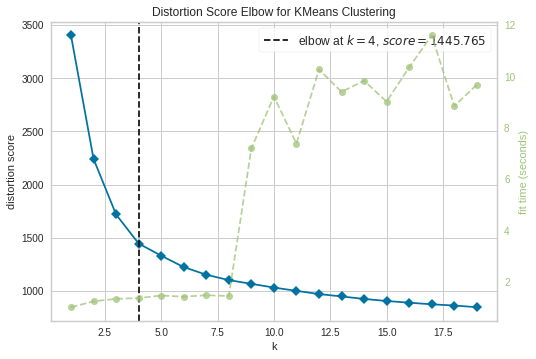

In [42]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 20))

visualizer.fit(embeds)
visualizer.show()

In [48]:
kmeans = KMeans(n_clusters = 3).fit(embeds)
centroids = kmeans.cluster_centers_
pred_clusters = kmeans.predict(embeds)

In [ ]:
# Для интрепретации вывожу топ 10 действй, наиболее близких к центру каждого кластера

In [49]:
dist_to_center = np.sum((embeds - centroids[pred_clusters]) ** 2, axis=1)

In [50]:
unique_events = np.array(unique_events)
for i in range(4):
    print(f'Cluster #{i+1}')
    idxs = np.where(pred_clusters == i)[0]
    nearest_idxs = np.argsort(dist_to_center[idxs])[:10]
    idxs = idxs[nearest_idxs]
    print(unique_events[idxs])
    print('----')

Cluster #1
['carnage' 'tokens' 'escape' 'cholera' 'reproach' 'alert' 'dumb' 'crime'
 'spoilt' 'poise']
----
Cluster #2
['settling' 'groping' 'arguing' 'sweating' 'snorting' 'carving' 'drooping'
 'limping' 'puffing' 'applying']
----
Cluster #3
['scanned' 'swayed' 'rattled' 'asserted' 'faltered' 'seized' 'pricked'
 'executed' 'harkened' 'mumbled']
----
Cluster #4
[]
----


### [бонус] Визуализируйте полученные кластеры с помощью TSNE или UMAP

In [51]:
%%time
tsne = TSNE(n_components=2, random_state=42)
embed_tsne = tsne.fit_transform(embeds)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



CPU times: user 44.2 s, sys: 416 ms, total: 44.7 s
Wall time: 11.4 s


In [52]:
fig = px.scatter(x=embed_tsne[:,0], y=embed_tsne[:,1], text=unique_events, color=pred_clusters)
fig.update_traces(textfont_size=2)
fig.show()

tsne-1.png

In [ ]:
# Супер адекватных результатов не получилось, выделились 3 кластера, соответвующие разным временам

In [ ]:
# В случае, если использовать предобученные эмбеддинги
ft = fasttext.load_model('cc.en.300.bin')

In [53]:
embeds = np.zeros((len(unique_events), 300))
for i in tqdm(range(len(unique_events))):
    embeds[i] = ft.get_word_vector(unique_events[i].lower())

  0%|          | 0/2605 [00:00<?, ?it/s]

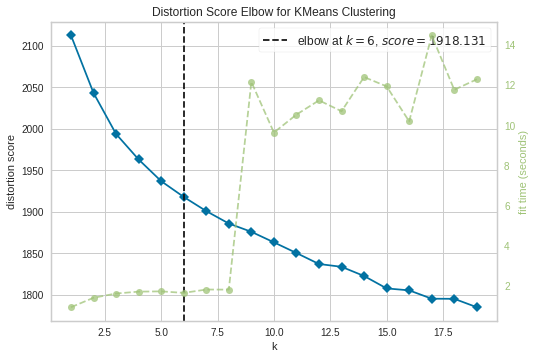

In [54]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 20))

visualizer.fit(embeds)
visualizer.show()

In [56]:
kmeans = KMeans(n_clusters = 6).fit(embeds)
centroids = kmeans.cluster_centers_
pred_clusters = kmeans.predict(embeds)
dist_to_center = np.sum((embeds - centroids[pred_clusters]) ** 2, axis=1)
unique_events = np.array(unique_events)
for i in range(6):
    print(f'Cluster #{i+1}')
    idxs = np.where(pred_clusters == i)[0]
    nearest_idxs = np.argsort(dist_to_center[idxs])[:10]
    idxs = idxs[nearest_idxs]
    print(unique_events[idxs])
    print('----')

Cluster #1
['disappearing' 'pretending' 'imagining' 'accumulating' 'stretching'
 'Stretching' 'straightening' 'standing' 'screaming' 'exclaiming']
----
Cluster #2
['bring' 'start' 'come' 'leave' 'refuse' 'stand' 'take' 'break' 'begin'
 'turn']
----
Cluster #3
['sauntered' 'shuddered' 'wandered' 'stepped' 'whispered' 'looked'
 'slipped' 'strolled' 'exclaimed' 'grumbled']
----
Cluster #4
['remembered' 'approached' 'disappeared' 'misinterpreted' 'discovered'
 'understood' 'considered' 'determined' 'Disappointed' 'disappointed']
----
Cluster #5
['laughter' 'Laughter' 'whisper' 'thunders' 'gurgling' 'grimace' 'hissing'
 'muffled' 'tremble' 'sadness']
----
Cluster #6
['acknowledgment' 'consequence' 'understanding' 'disappointment'
 'dissatisfaction' 'introduction' 'down-spirited' 'considering'
 'circumstance' 'conversation']
----


In [57]:
%%time
tsne = TSNE(n_components=2, random_state=42)
embed_tsne = tsne.fit_transform(embeds)
fig = px.scatter(x=embed_tsne[:,0], y=embed_tsne[:,1], text=unique_events, color=pred_clusters)
fig.update_traces(textfont_size=2)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



CPU times: user 54.5 s, sys: 443 ms, total: 54.9 s
Wall time: 14.2 s


tsne-2.png

In [ ]:
# Визуализация получается не очень, зато если по смотреть на примеры действий из каждого кластера можно выделить сущности свзанные с физической активностью, связанные с речью

### Часть 2

Не доделал CRF, кусок кода CNN-BiLSTM в блокноте part-2.ipynb

## Часть 3

В блокнотах part-3-*.ipynb

### Часть 5

Резюме: Провел эксплоративный анализ данных, реализовал BiLSTM, Bert+BiLSTM  для извлечения действий от BiLSTM получилось добиться лучших результатов, хотя и ее качество оставляет желать лучшего. Долго пришлось разбираться с LSTM и ее переобучением. Также попытался сделать модель CNN+BILSTM+CRF для извлечения сущностей, но не дописал модуль CRF, поэтому результатов получить не удалось.
Помгли гугл и семинары, не хватило свободного времени и опыта работы с LSTM.